In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "../data/Mouse_metadata.csv"
study_results_path = "../data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df1 = pd.DataFrame(mouse_metadata)
df2 = pd.DataFrame(study_results)

mouse_df = pd.merge(mouse_metadata,study_results,on='Mouse ID',how='inner')

# Display the data table for preview

mouse_df.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
#Check unique IDs and remove duplicates
mouse_df['Mouse ID'].nunique()
check = mouse_df[['Mouse ID', 'Timepoint']]
check.groupby(['Mouse ID']).count().sort_values('Timepoint',ascending=False)

mouse_df.loc[(mouse_df['Mouse ID'] == 'g989')]
clean_df = mouse_df.drop(mouse_df[mouse_df['Mouse ID'] == 'g989'].index)

clean_df['Mouse ID'].unique()

array(['k403', 's185', 'x401', 'm601', 'g791', 's508', 'f966', 'm546',
       'z578', 'j913', 'u364', 'n364', 'y793', 'r554', 'm957', 'c758',
       't565', 'a644', 'i177', 'j989', 'i738', 'a520', 'w914', 'r811',
       'g288', 'i334', 'q610', 'd251', 'l897', 'c458', 'b742', 'b128',
       'j246', 'a411', 'j119', 'w150', 'v923', 'g316', 's710', 'l509',
       'r944', 'e662', 'u196', 'q597', 'a444', 'i557', 'r921', 'w678',
       'y449', 'a203', 'a251', 'a262', 'a275', 'a366', 'a401', 'a457',
       'a492', 'a577', 'a685', 'a699', 'a788', 'a818', 'a897', 'a963',
       'b313', 'b447', 'b487', 'b559', 'b759', 'b879', 'c139', 'c264',
       'c282', 'c302', 'c326', 'c402', 'c559', 'c580', 'c757', 'c766',
       'c819', 'c832', 'c895', 'c927', 'd133', 'd164', 'd474', 'e213',
       'e227', 'e291', 'e476', 'e584', 'f129', 'f234', 'f278', 'f345',
       'f394', 'f436', 'f545', 'f932', 'f993', 'g107', 'g296', 'g497',
       'g558', 'g570', 'g867', 'h246', 'h333', 'h428', 'h531', 'i386',
      

In [3]:
#Create summary statistics
drug_mean = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
drug_median = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
drug_var = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
drug_dev = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
drug_err = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

drug_summary = pd.DataFrame({'Mean Tumor Volume': drug_mean,
                             'Median Tumor Volume': drug_median,
                             'Tumor Volume Variance': drug_var,
                             'Tumor Volume Std. Dev.': drug_dev,
                             'Tumor Volume Std. Err.': drug_err})

drug_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Text(0, 0.5, '# of Observed Mouse Timepoints')

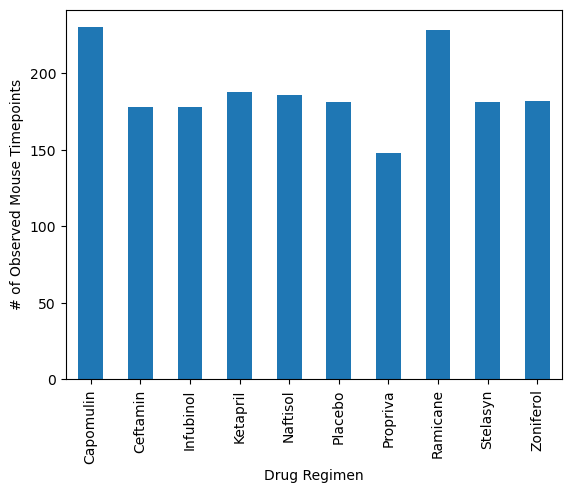

In [4]:
#Create bar chart using DataFrame.plot() method
observations = clean_df.groupby(['Drug Regimen'])['Mouse ID'].count()

plot = clean_df.groupby(['Drug Regimen'])['Mouse ID'].count().plot(kind='bar')
plt.ylabel('# of Observed Mouse Timepoints')

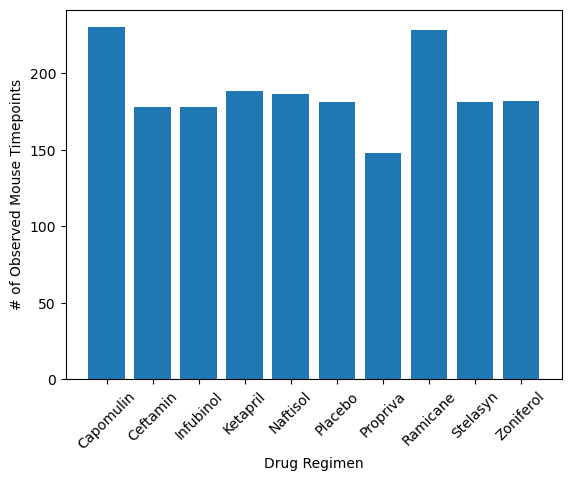

In [5]:
#create bar chart using pyplot() method
observations
observations = observations.reset_index()
observations_df = pd.DataFrame(observations)
observations_df
x = observations_df['Drug Regimen']
y = observations_df['Mouse ID']
plt.bar(x, y)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=45)
plt.show()

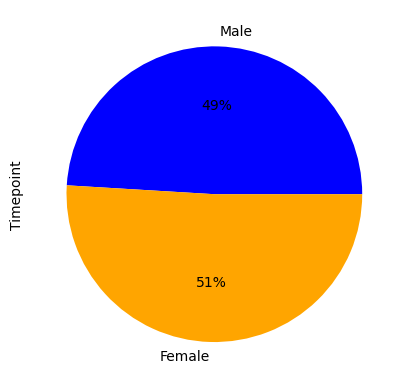

In [6]:
#Create Pie Chart

sex_data = clean_df.groupby(['Sex'])['Timepoint'].count()
sex_data = sex_data.reset_index

colors = ['blue', 'orange']

labels = ['Male', 'Female']

plot = sex_data(['Sex'])['Timepoint'].plot(kind='pie', y=['Timepoint'], colors=colors, autopct='%1.0f%%', labels=labels)


In [7]:
#Calculations for max time and merging

max_time = clean_df.groupby(['Mouse ID'])['Timepoint'].max()

time_df = pd.DataFrame({'Max Timepoint': max_time})
time_df

test_df = pd.merge(clean_df,time_df,on='Mouse ID')

test_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2,45
1876,z969,Naftisol,Male,9,30,30,65.841013,3,45
1877,z969,Naftisol,Male,9,30,35,69.176246,4,45
1878,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [8]:
#Make list for testing regimens and tumor volume data


regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

tumor_vol = []

for drug in regimen:
    # Filter rows corresponding to the current drug regimen
    drug_data = test_df[test_df['Drug Regimen'] == drug]
    
    # Get the row with the maximum timepoint for each mouse
    max_timepoints = drug_data.groupby('Mouse ID')['Timepoint'].max()
    final_tumor_volumes = []
    for mouse_id, max_timepoint in max_timepoints.items():
        # Retrieve the final tumor volume for each mouse
        final_tumor_volume = drug_data.loc[(drug_data['Mouse ID'] == mouse_id) & 
                                           (drug_data['Timepoint'] == max_timepoint), 
                                           'Tumor Volume (mm3)'].values
        # Append the final tumor volume to the list
        final_tumor_volumes.extend(final_tumor_volume)
    
    # Append the list of final tumor volumes for the current drug regimen to tumor_vol
    tumor_vol.append(final_tumor_volumes)

tumor_vol


[[38.98287774,
  38.93963263,
  30.48598484,
  37.07402422,
  40.1592203,
  47.68596303,
  37.31184577,
  38.1251644,
  38.75326548,
  41.48300765,
  38.84687569,
  28.43096411,
  33.32909778,
  46.53920617,
  32.37735684,
  41.58152074,
  23.34359787,
  40.72857787,
  34.45529799,
  31.02392294,
  40.65812366,
  39.95234669,
  36.04104736,
  28.48403281,
  31.8962384],
 [38.4076183,
  43.0475426,
  38.81036633,
  32.97852192,
  38.34200823,
  33.39765251,
  37.31123552,
  40.65900627,
  29.12847181,
  33.56240217,
  36.37451039,
  31.56046955,
  36.13485243,
  22.05012627,
  30.56462509,
  31.09533505,
  45.22086888,
  36.56165229,
  37.22565033,
  43.41938077,
  30.27623175,
  40.66771292,
  43.16637266,
  44.18345092,
  30.63869575],
 [67.97341878,
  65.52574285,
  57.03186187,
  66.08306589,
  72.2267309,
  36.3213458,
  60.96971133,
  62.43540402,
  60.91876652,
  67.28962147,
  66.19691151,
  62.11727887,
  47.01036401,
  60.16518046,
  55.62942846,
  45.69933088,
  54.65654872,


In [9]:
tumor_volumes = {treatment: [] for treatment in regimen}

# Populate the dictionary with final tumor volumes
for treatment in regimen:
    treatment_data = test_df[test_df['Drug Regimen'] == treatment]
    max_timepoints = treatment_data.groupby('Mouse ID')['Timepoint'].max()
    for mouse_id, max_timepoint in max_timepoints.items():
        final_tumor_volume = treatment_data.loc[(treatment_data['Mouse ID'] == mouse_id) & 
                                                 (treatment_data['Timepoint'] == max_timepoint), 
                                                 'Tumor Volume (mm3)'].values
        tumor_volumes[treatment].extend(final_tumor_volume)

# Determine outliers and print the results
outliers = {}
for treatment, volumes in tumor_volumes.items():
    quartiles = pd.Series(volumes).quantile([0.25, 0.5, 0.75])
    lower_q, upper_q = quartiles[0.25], quartiles[0.75]
    iqr = upper_q - lower_q
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr
    
    potential_outliers = [volume for volume in volumes if volume < lower_bound or volume > upper_bound]
    outliers[treatment] = potential_outliers
    print(f'Potential outliers for {treatment}: {potential_outliers}')

Potential outliers for Capomulin: []
Potential outliers for Ramicane: []
Potential outliers for Infubinol: [36.3213458]
Potential outliers for Ceftamin: []


AttributeError: 'dict_keys' object has no attribute 'outlier_index'

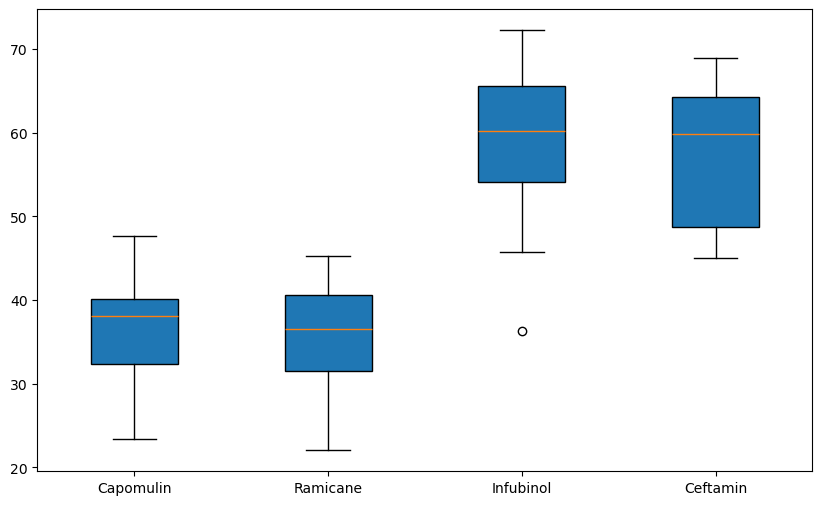

In [10]:
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_volumes.values(), labels=tumor_volumes.keys(), patch_artist=True)

# Highlight potential outliers
for treatment, volumes in tumor_volumes.items():
    for outlier in outliers[treatment]:
        outlier_index = volumes.index(outlier) + 1
        plt.scatter(tumor_volumes.keys().outlier_index(treatment) + 1, outlier, color='red', marker='x')

plt.title('Distribution of Final Tumor Volume by Treatment Group')
plt.xlabel('Treatment Group')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Tumor Volume (mm3)')

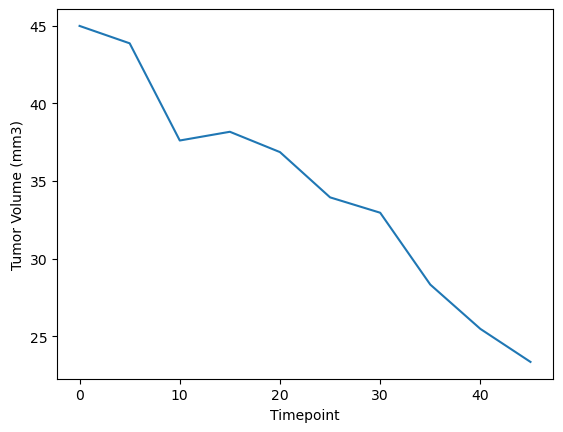

In [ ]:
#select a single mouse treated with Capomulin and generate a line plot for tumor volume

mouse_id = 's185'
regimen = 'Capomulin'

line_ex = test_df.loc[(test_df['Mouse ID'] == mouse_id) & (test_df['Drug Regimen'] == regimen)]

line_ex

plt.plot(line_ex['Timepoint'], line_ex['Tumor Volume (mm3)'])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')


Text(0, 0.5, 'Tumor Volume (mm3)')

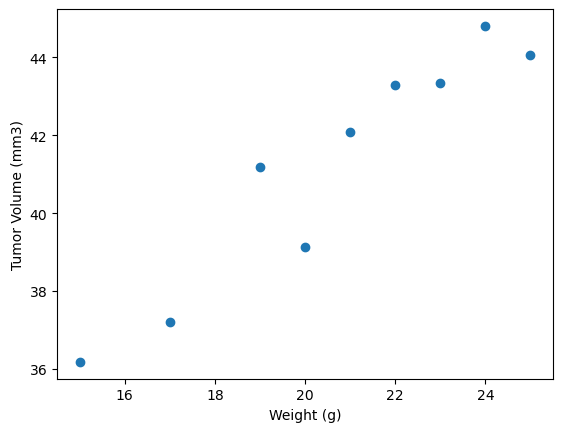

In [ ]:
capomulin = test_df.loc[(test_df['Drug Regimen'] == 'Capomulin')]
capomulin_group = capomulin.groupby('Weight (g)').mean('Tumor Volume (mm3)')
capomulin_group = capomulin_group.reset_index()
capomulin_df = pd.DataFrame(capomulin_group)


plt.scatter(capomulin_df['Weight (g)'], capomulin_df['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

0.9505243961855268
0.894772609734063 22.764229983591896 0.9505243961855268 8.449451040646352e-05 0.11052782862741348


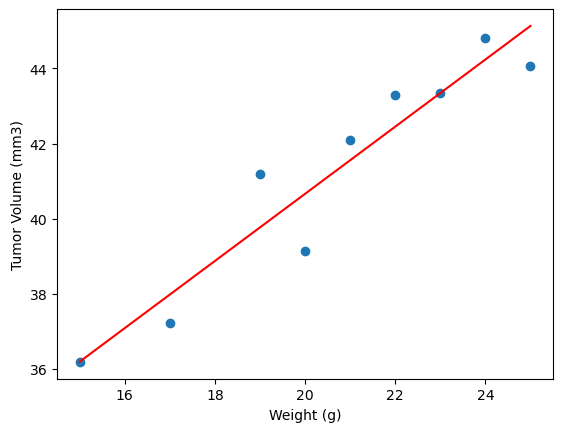

In [ ]:
weights = capomulin_df['Weight (g)']
tumor_volumes = capomulin_df['Tumor Volume (mm3)']

# Calculate the correlation coefficient
correlation_coefficient = np.corrcoef(weights, tumor_volumes)[0, 1]
print(correlation_coefficient)
# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(weights, tumor_volumes)
print(slope, intercept, r_value, p_value, std_err)

plt.scatter(capomulin_df['Weight (g)'], capomulin_df['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

x_values = np.array([min(weights), max(weights)])
y_values = slope * x_values + intercept
plt.plot(x_values, y_values, color='red', label='Linear Regression')